## <center>Tugas Besar 1 Bagian A</center>
####  <center>Eksplorasi <i>library <strong>Decision Tree Learning</strong></i> pada <i>Jupyter Notebook</i></center>

### 1. Melakukan pembelajaran DTL dan Id3Estimator

a. Membaca dataset <i>iris</i> dan dataset <i>play-tennis</i>

In [136]:
# Importing some utils
from sklearn import tree, preprocessing
import matplotlib.pyplot as plt

from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text as export_text_id3

# Import load_iris untuk mendapatkan fungsi load dataset iris
from sklearn.datasets import load_iris

# Import pandas untuk membaca file csv berisi dataset play-tennis
import pandas as pd

In [137]:
# Membaca dataset iris dari load_iris
iris_data = load_iris()

# Membaca dataset play-tennis dari file csv
playtennis_dataframe = pd.read_csv("play_tennis.csv")

b. Melakukan pembelajaran <i>Decision Tree Learning</i> dengan <i>Decision Tree Classifier</i> dan <i>Id3Estimator</i>

<strong>Dataset Iris</strong>

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



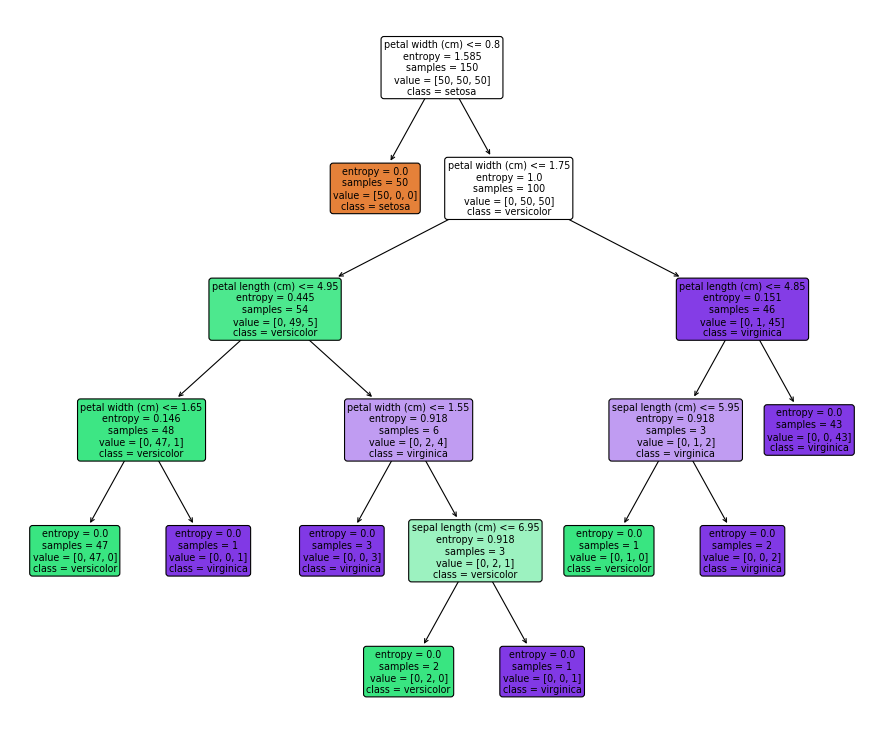

In [138]:
## Decision Tree Classifier
dtl_iris = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
dtl_iris = dtl_iris.fit(iris_data.data, iris_data.target)

### Menampilkan model pohon dengan export_text 
print(tree.export_text(dtl_iris, feature_names=iris_data['feature_names']))

### Menampilkan model pohon dengan plot_tree
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(dtl_iris, filled=True, rounded=True, class_names=iris_data.target_names, feature_names=iris_data.feature_names)
plt.show()

In [139]:
## Id3Estimator
id3_iris = Id3Estimator()
id3_iris = id3_iris.fit(iris_data.data, iris_data.target)

### Menampilkan model pohon dengan menggunakan export_text_id3
print(export_text_id3(id3_iris.tree_, feature_names=iris_data.feature_names))

### Export model pohon dengan export_graphviz sehingga menjadi file .dot
# id3_iris_tree = export_graphviz(id3_iris.tree_, 'id3_tree.dot', iris_data.feature_names)

### Ubah file .dot menjadi .pdf dengan menggunakan graphviz
# dot -Tpdf id3_tree.dot -o tree.pdf


petal length (cm) <=2.45: 0 (50) 
petal length (cm) >2.45
|   petal width (cm) <=1.75
|   |   sepal length (cm) <=7.10
|   |   |   sepal width (cm) <=2.85: 1 (27/4) 
|   |   |   sepal width (cm) >2.85: 1 (22) 
|   |   sepal length (cm) >7.10: 2 (1) 
|   petal width (cm) >1.75
|   |   sepal length (cm) <=5.95
|   |   |   sepal width (cm) <=3.10: 2 (6) 
|   |   |   sepal width (cm) >3.10: 1 (1) 
|   |   sepal length (cm) >5.95: 2 (39) 



<img src="iris_id3.png">

<strong>Dataset Play Tennis</strong>

In [140]:
## Buat data dan target terlebih dahulu
playtennis_data = playtennis_dataframe.drop("day",axis=1).drop("play",axis=1)
playtennis_target = playtennis_dataframe.play

## Encoding untuk data kategorikal
enc = preprocessing.LabelEncoder()
playtennis_data = playtennis_data.apply(enc.fit_transform)

|--- outlook <= 0.50
|   |--- class: Yes
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- outlook >  1.50
|   |   |   |--- class: No
|   |--- humidity >  0.50
|   |   |--- wind <= 0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: No
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: Yes
|   |   |--- wind >  0.50
|   |   |   |--- class: Yes



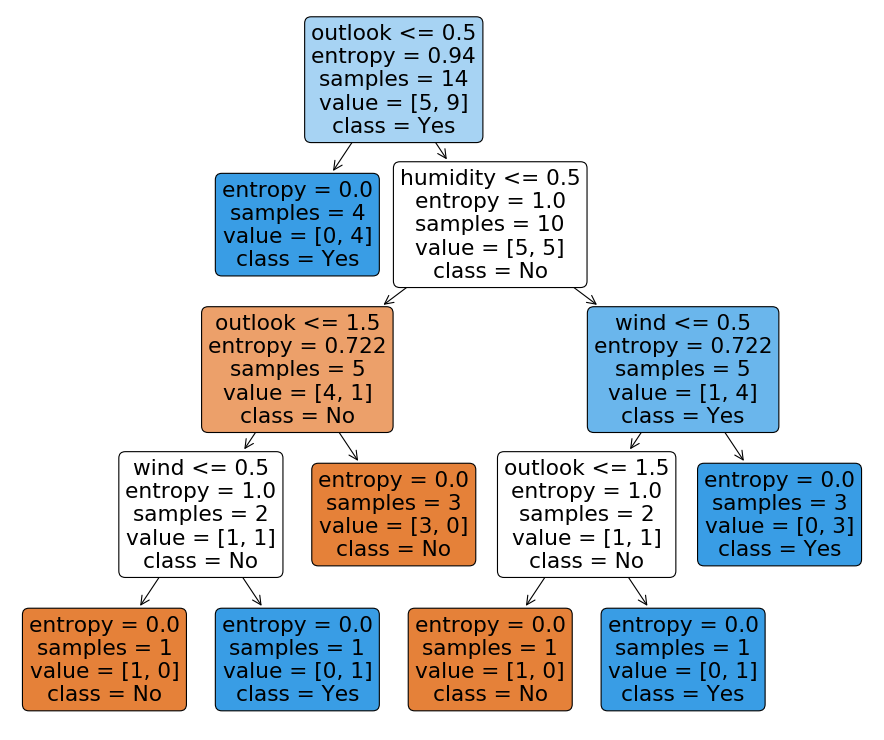

In [141]:
## Decision Tree Classifier
dtl_playtennis = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
dtl_playtennis = dtl_playtennis.fit(playtennis_data, playtennis_target)

### Membuat feature_names(kolom atribut) dan target_names(kolom target)
playtennis_feature_names = pd.array(playtennis_data.columns)
playtennis_target_names = pd.array(["No","Yes"])

### Menampilkan model pohon dengan export_text
print(tree.export_text(dtl_playtennis, feature_names=playtennis_feature_names))

### Menampilkan model pohon dengan plot_tree
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(dtl_playtennis, filled=True, rounded=True, class_names=playtennis_target_names, feature_names=playtennis_feature_names)
plt.show()

In [142]:
## Id3Estimator
id3_playtennis = Id3Estimator()
id3_playtennis = id3_iris.fit(playtennis_data, playtennis_target)

### Menampilkan model pohon dengan menggunakan export_text_id3
print(export_text_id3(id3_playtennis.tree_, feature_names=playtennis_feature_names))

### Export model pohon dengan export_graphviz sehingga menjadi file .dot
# id3_playtennis_tree = export_graphviz(id3_playtennis.tree_, 'id3_tree.dot', playtennis_feature_names)

### Ubah file .dot menjadi .pdf dengan menggunakan graphviz
# dot -Tpdf id3_tree.dot -o tree.pdf


outlook <=0.50: Yes (4) 
outlook >0.50
|   humidity <=0.50
|   |   temp <=1.50: No (2) 
|   |   temp >1.50
|   |   |   wind <=0.50: No (1) 
|   |   |   wind >0.50: No (1/1) 
|   humidity >0.50
|   |   wind <=0.50
|   |   |   temp <=1.00: No (1) 
|   |   |   temp >1.00: Yes (1) 
|   |   wind >0.50: Yes (3) 



<img src="playtennis_id3.png">